In [8]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('asteroid_data.csv')

In [3]:
df.head()

,name,approach_date,diameter_km,velocity_kmph,distance_km,is_hazardous
0,478784 (2012 UV136),2025-06-02,0.045,49511.25,50442662.03,False
1,(2015 RQ35),2025-06-02,0.082,11950.19,70450034.10,False
2,(2016 EL27),2025-06-02,0.036,25733.18,54278219.47,False
3,(2019 VF1),2025-06-02,0.149,80619.27,23118633.90,False
4,(2020 XS5),2025-06-02,0.027,40999.06,36304847.90,False


Define a label:

If distance < 1 million km and size > 140m → "High Risk"

Else if either condition met → "Medium Risk"

Else → "Low Risk"

👉 This creates a supervised dataset for ML.

In [4]:
max(df['diameter_km'])

3.855

In [9]:
conditions = [
    (df['distance_km'] < 1000000) & (df['diameter_km'] > 1.40),
    (df['distance_km'] < 1000000) | (df['diameter_km'] > 1.40)
]

# Define the choices
choices = ['High Risk', 'Medium Risk']

# Create the 'risk' column
df['risk'] = np.select(conditions, choices, default='Low Risk')


In [10]:
df

,name,approach_date,diameter_km,velocity_kmph,distance_km,is_hazardous,risk
0,478784 (2012 UV136),2025-06-02,0.045,49511.25,50442662.03,False,Low Risk
1,(2015 RQ35),2025-06-02,0.082,11950.19,70450034.10,False,Low Risk
2,(2016 EL27),2025-06-02,0.036,25733.18,54278219.47,False,Low Risk
3,(2019 VF1),2025-06-02,0.149,80619.27,23118633.90,False,Low Risk
4,(2020 XS5),2025-06-02,0.027,40999.06,36304847.90,False,Low Risk
...,...,...,...,...,...,...,...
1590,(2024 FA),2025-03-09,0.187,86494.30,27568592.00,False,Low Risk
1591,(2025 DE4),2025-03-09,0.063,48490.37,7719477.82,False,Low Risk
1592,(2025 DX4),2025-03-09,0.042,8333.79,14738665.39,False,Low Risk
1593,(2025 DZ6),2025-03-09,0.059,35613.66,4999225.93,False,Low Risk


In [11]:
# Define the mapping
risk_mapping = {
    'Low Risk': 0,
    'Medium Risk': 1,
    'High Risk': 2
}

# Apply the mapping
df['risk_numeric'] = df['risk'].map(risk_mapping)

In [12]:
df

,name,approach_date,diameter_km,velocity_kmph,distance_km,is_hazardous,risk,risk_numeric
0,478784 (2012 UV136),2025-06-02,0.045,49511.25,50442662.03,False,Low Risk,0
1,(2015 RQ35),2025-06-02,0.082,11950.19,70450034.10,False,Low Risk,0
2,(2016 EL27),2025-06-02,0.036,25733.18,54278219.47,False,Low Risk,0
3,(2019 VF1),2025-06-02,0.149,80619.27,23118633.90,False,Low Risk,0
4,(2020 XS5),2025-06-02,0.027,40999.06,36304847.90,False,Low Risk,0
...,...,...,...,...,...,...,...,...
1590,(2024 FA),2025-03-09,0.187,86494.30,27568592.00,False,Low Risk,0
1591,(2025 DE4),2025-03-09,0.063,48490.37,7719477.82,False,Low Risk,0
1592,(2025 DX4),2025-03-09,0.042,8333.79,14738665.39,False,Low Risk,0
1593,(2025 DZ6),2025-03-09,0.059,35613.66,4999225.93,False,Low Risk,0


# EDA

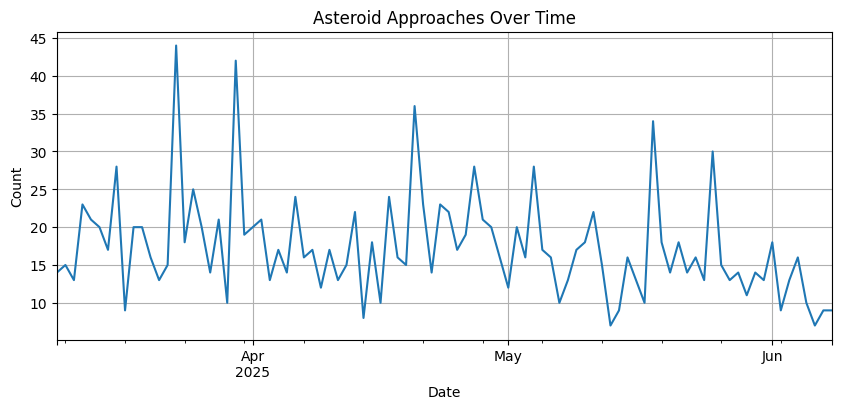

In [16]:
df['approach_date'] = pd.to_datetime(df['approach_date'])
daily_counts = df.groupby('approach_date').size()

import matplotlib.pyplot as plt
daily_counts.plot(title='Asteroid Approaches Over Time', figsize=(10, 4))
plt.xlabel("Date")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [13]:
correlation_matrix = df.corr()

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

ValueError: could not convert string to float: '478784 (2012 UV136)'